# Analysis of the Ca8452 line

In [1]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')


In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi3 as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaIR

In [3]:
folder_path = "D:/solar flares/data/2015-09-27/"
file_n="fits/crispex.8542.10_34_29.stokesI.icube"

from ISPy.io import lapalma as lp

#######################################################
# The number of wavelenghts are apriori unknown execpt if not in the icube so ...
number_wavelenghts = 21
# which is an assuption which we will check

cube = lp.read(file_n , 21)
print(cube.shape)
number_of_frames = cube.shape[0]

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= number_of_frames:
        raise IndexError(f'frame number {frame} is not in (0, {number_of_frames}).')
    return folder_path + file_n
    
ttff = timeframe_to_filename_fits


def alternative_datacube(timeframe):
    if timeframe >= number_of_frames or timeframe < 0:
        raise IndexError(f"Timeframe {timeframe} is negative or exeeds numer of frames {number_of_frames}.")
    return cube[timeframe, 0]


(47, 1, 21, 957, 968)


In [4]:
tseries = rs( "tseries.8542.103429.calib.sav")
tseries


{'tstep': 6,
 'clip': array([12,  4,  2,  1], dtype='>i2'),
 'tile': array([ 6,  8, 14, 24], dtype='>i2'),
 'scale': 16.891891,
 'ang': array([ 0.02397558,  0.02290806,  0.02184264,  0.02077999,  0.01971938,
         0.01866133,  0.01760626,  0.01655051,  0.01549687,  0.01444594,
         0.01339666,  0.01235133,  0.01130783,  0.01026897,  0.00923236,
         0.00819818,  0.00716443,  0.00613354,  0.00510588,  0.00407826,
         0.00305308,  0.00203395,  0.00101579,  0.        , -0.00101457,
        -0.00202678, -0.0030373 , -0.00404258, -0.0050453 , -0.00604627,
        -0.007043  , -0.00803921, -0.00903239, -0.0100206 , -0.01100856,
        -0.01199151, -0.01297069, -0.01394776, -0.01492336, -0.01589504,
        -0.01686508, -0.01783037, -0.01879359, -0.01975422, -0.02071248,
        -0.0216652 , -0.02261698], dtype='>f8'),
 'shift': array([[ 4.58648466, -2.8170809 ],
        [ 4.3865073 , -2.53915145],
        [ 4.18530591, -2.57130913],
        [ 3.88779837, -2.43169094],
      

In [5]:
tseries['shift']

array([[ 4.58648466, -2.8170809 ],
       [ 4.3865073 , -2.53915145],
       [ 4.18530591, -2.57130913],
       [ 3.88779837, -2.43169094],
       [ 3.35318942, -2.30902734],
       [ 3.02100999, -2.07217794],
       [ 2.59803708, -2.00267693],
       [ 2.55629039, -2.12424349],
       [ 2.15729241, -1.76739315],
       [ 1.54899599, -1.69025597],
       [ 1.3625288 , -1.70713829],
       [ 0.95109507, -1.32217084],
       [ 0.64265575, -1.16603019],
       [ 0.46767971, -0.99038961],
       [ 0.        , -0.6422553 ],
       [ 0.02172587, -0.74788484],
       [-0.53166339, -0.80827949],
       [-0.46277069, -0.71598849],
       [-0.71082987, -0.41625044],
       [-1.20576898, -0.72985715],
       [-1.45264362, -0.45774946],
       [-1.9761075 , -0.24918529],
       [-2.07285507, -0.02073259],
       [-2.23988368,  0.        ],
       [-2.31289409,  0.22023686],
       [-2.09528717,  0.20493866],
       [-2.30103655,  0.42085437],
       [-2.09109067,  0.46616027],
       [-2.2049645 ,

In [6]:
time_list = tseries["time"]
print(time_list, [t.decode("utf-8") for t in time_list])

[b'10:34:37.966' b'10:35:10.238' b'10:35:42.511' b'10:36:14.766'
 b'10:36:47.025' b'10:37:19.273' b'10:37:51.498' b'10:38:23.812'
 b'10:38:56.131' b'10:39:28.437' b'10:40:00.763' b'10:40:33.039'
 b'10:41:05.331' b'10:41:37.552' b'10:42:09.777' b'10:42:42.001'
 b'10:43:14.287' b'10:43:46.560' b'10:44:18.809' b'10:44:51.135'
 b'10:45:23.463' b'10:45:55.680' b'10:46:27.947' b'10:47:00.220'
 b'10:47:32.537' b'10:48:04.862' b'10:48:37.218' b'10:49:09.491'
 b'10:49:41.768' b'10:50:14.076' b'10:50:46.335' b'10:51:18.666'
 b'10:51:50.989' b'10:52:23.241' b'10:52:55.577' b'10:53:27.842'
 b'10:54:00.077' b'10:54:32.337' b'10:55:04.645' b'10:55:36.920'
 b'10:56:09.239' b'10:56:41.499' b'10:57:13.790' b'10:57:46.096'
 b'10:58:18.425' b'10:58:50.671' b'10:59:22.990'] ['10:34:37.966', '10:35:10.238', '10:35:42.511', '10:36:14.766', '10:36:47.025', '10:37:19.273', '10:37:51.498', '10:38:23.812', '10:38:56.131', '10:39:28.437', '10:40:00.763', '10:40:33.039', '10:41:05.331', '10:41:37.552', '10:42:09.

In [7]:
zeros = [np.array(alternative_datacube(0)[:, 920, 0])]
alternative_datacube(0).shape, zeros

((21, 957, 968),
 [array([221, 185, 176, 169, 159, 148, 137, 123, 109,  99,  95,  98, 108,
         121, 136, 148, 162, 173, 181, 192, 225], dtype=int16)])

D:/solar flares/data/2015-09-27/fits/crispex.8542.10_34_29.stokesI.icube
the shape of the data is (47, 1, 21, 957, 968)
the wavelengths are self._wavel = array([8540.25 , 8541.055, 8541.265, 8541.405, 8541.545, 8541.65 ,
       8541.72 , 8541.79 , 8541.86 , 8541.93 , 8542.   , 8542.07 ,
       8542.14 , 8542.21 , 8542.28 , 8542.35 , 8542.455, 8542.595,
       8542.735, 8542.945, 8543.75 ], dtype='>f8')
self.zeros = [array([221, 185, 176, 169, 159, 148, 137, 123, 109,  99,  95,  98, 108,
       121, 136, 148, 162, 173, 181, 192, 225], dtype=int16)]
self.zeros = [array([221, 185, 176, 169, 159, 148, 137, 123, 109,  99,  95,  98, 108,
       121, 136, 148, 162, 173, 181, 192, 225], dtype=int16)]
(957, 968) (957, 968)
Boundary
Blue=Outside, yellow=Inside


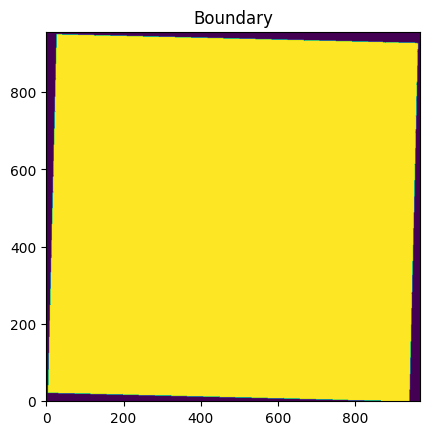

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


([array([221, 185, 176, 169, 159, 148, 137, 123, 109,  99,  95,  98, 108,
         121, 136, 148, 162, 173, 181, 192, 225], dtype=int16)],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]))

In [10]:
reload(un)
CaIR = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename="D:/solar flares/data/2017-09-10/line_data/spectfile.8542.idlsave", 
    number_of_frames=number_of_frames,
    time=time_list, 
    name_of_line='CaIR15a', 
    thresh=[0, np.percentile(alternative_datacube(0), 95)],  
    boundary_methode='search', 
    boundary_arguments = {"error":0.0001,  "zeros":zeros}, #"index_of_zero":[],
    alternative_datacube=alternative_datacube, 
    with_stokes=False,
    with_time=True,
    shape = (47, 1, 21, 957, 968), 
    cont_point=None
)
# (self, timeframe_to_filename_fits, spectfilename, number_of_frames, time, name_of_line,
#                  thresh=[1e-10,2e-7], boundary_methode='search', alternative_datacube=None,
#                  boundary_arguments=None, cont_point=None, with_stokes=False, with_time=False
# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30], 
zeros, CaIR.boundary[::100, ::100]

In [11]:
# CaIR.calculate__FOV_spect_over_time()


In [12]:

s = np.sum(CaIR.boundary)
areafactor = 60**2 / (np.pi*950**2)

print(s, 'percentage of frame good:', s/847550, 'areafactor:', areafactor) # to account for a bit of extra non excluded pixels


# CaIR.datacube[70,0,:,600,600]

868450.0 percentage of frame good: 1.0246593121349772 areafactor: 0.001269712565386866


In [13]:
def gess_filters(n_wav):
    sd = n_wav/8
    return [[n_wav/6 - 0.5, sd], [3 * n_wav/6 - 0.5, sd], [5 * n_wav / 6 - 0.5, sd]]



21
[[3.0, 2.625], [10.0, 2.625], [17.0, 2.625]] 21


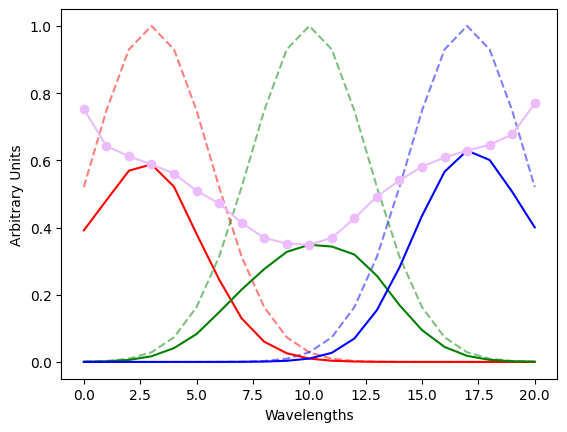

In [14]:
# %matplotlib inline
print(len(CaIR._wavel))
Meansd = gess_filters(len(CaIR._wavel))
print(Meansd,len(CaIR._wavel) )
CaIR.update_filters(Meansd)
CaIR.plot_filt(880,900)

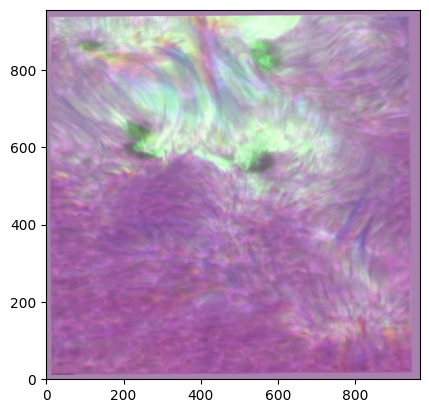

In [15]:
# %matplotlib inline

CaIR.ccp_frame(30,Show=False)
CaIR.thresh=[1e-7,2e-5]
plt.imshow(CaIR.current_ccp[:,:], origin='lower')
# plt.imshow(CaIR.boundary[::-1,:], alpha=0.2)
plt.show()

#interesting pixel: (1030, 975)

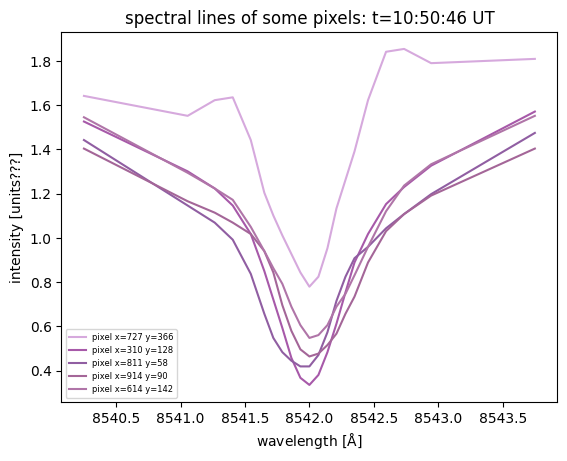

In [16]:
CaIR.interesting_pixels( frame=30, pixels=[(600, 600)], rand=True, numb=5)

COCOPLOT at  t=10:34:37 UT (frame number 0 )


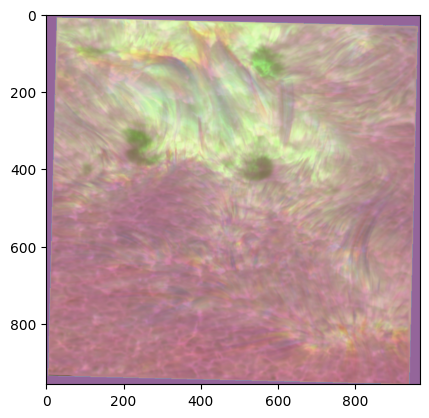

COCOPLOT at  t=10:56:09 UT (frame number 40 )


In [17]:
# Many COCOPLOTS
r = CaIR._number_of_frames
for i in range(0,r,40):
    tstr = CaIR.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    CaIR.ccp_frame(i,Show=False)
    plt.imshow(CaIR.current_ccp[::-1,:])

    plt.imshow(CaIR.boundary[::-1,:], alpha=0.2)
    plt.show()


In [ ]:
plt.plot(CaIR.datacube(0)[0])
plt.show()
plt.plot(CaIR.datacube(0)[10])
plt.show()
plt.plot(CaIR.datacube(0)[20])
plt.show()

COCOPLOT at  t=10:45:23 UT (frame number 20 )


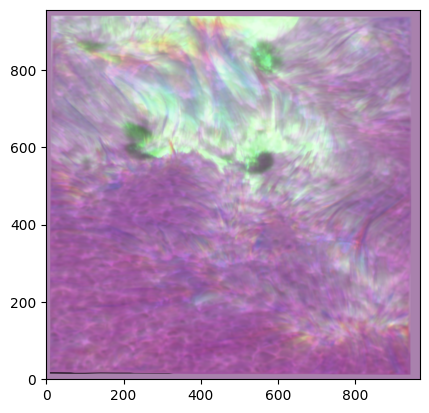

In [28]:
CaIR.ccp_frame(20)
pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# CaIR.current_ccp[0:30:5,0:60:5,:]

In [29]:
CaIR.calculate__FOV_spect_over_time()


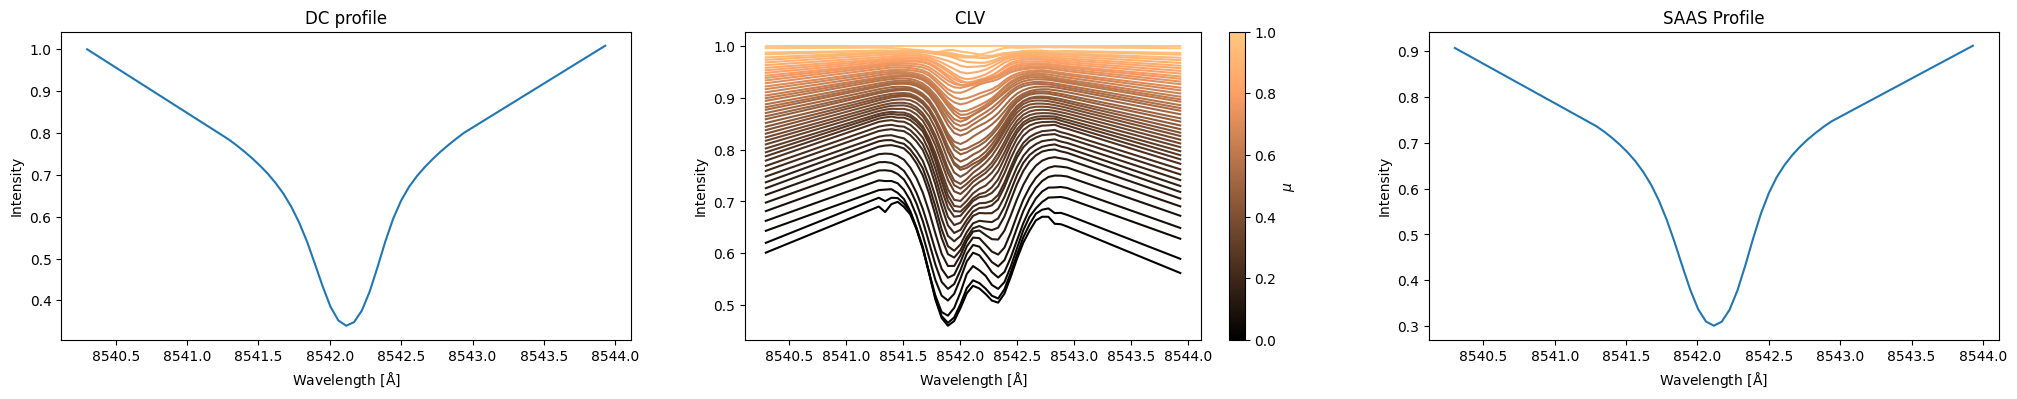

In [30]:
reload(un)
theor_CaIR = un.linestudier("D:/solar flares/data/2017-09-06/fits/8542_clv.fits", nr=101)
# theor_CaIR.saas_profile_atlas_check(show_all=False, initial_values_fit=np.array([-2.364e+00,  1.412e-02,  1.380e+00]))

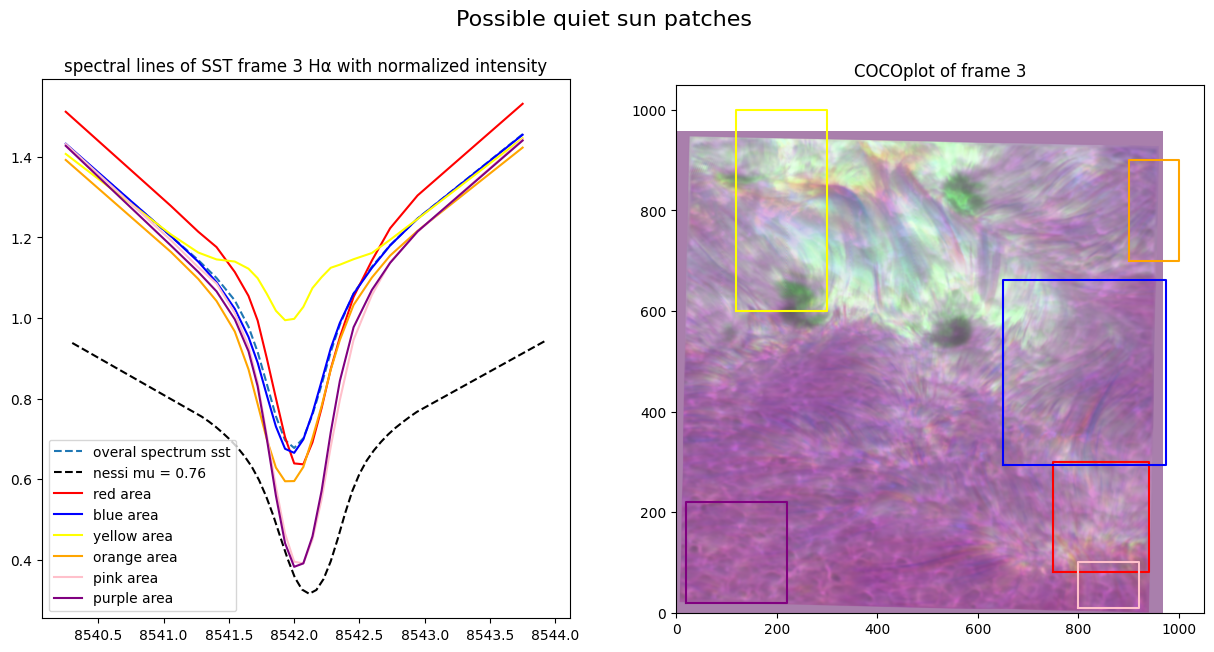

In [31]:
# %matplotlib widget
# %matplotlib inline
frame = 3

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(120,300), (600,1000)], [(900, 1000), (700, 900)], [(800,920), (10,100)] 
     , [(20,220), (20,220)]]

CaIR.possible_quiet_sun_patches(frame, theor_line = theor_CaIR, X=X)

In [32]:
# the chosen quiet sun patch is 
color_wanted_patch = "purple"

# choose from
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


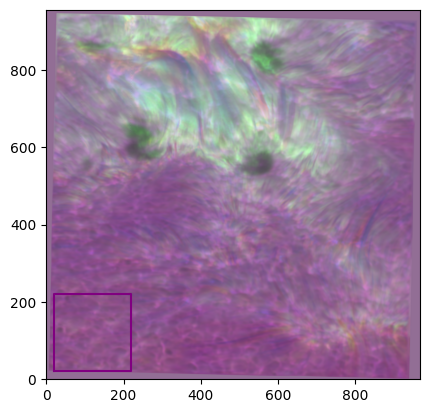

In [20]:
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
CaIR.set_quiet_sun(frame, xlim, ylim, show=False, color=color_wanted_patch)

## Finding $\mu$

In [26]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8284\2840510315.py:29: RuntimeWarning: invalid value encountered in arcsin
  return np.cos(np.arcsin(rad_dist))


does MU contain nan's? True
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.14268499844174526 for timeframe 0
Coundourplot succesfully saved.


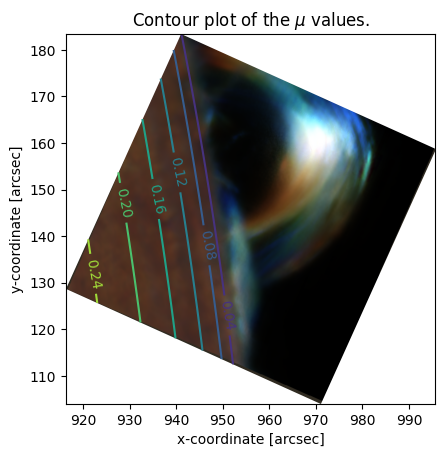

In [28]:

# frame = 0
# extent = timeframe_to_extent(frame, ttff, invert=False, shift=(-1.2,0))
# xx, yy, MU = extent_to_grid(extent, Hbeta.shape, invert=False, angle=angle)
# xx0=xx
# yy0=yy


# mu = give_mu_contourplot(
#     MU,
#     xx,
#     yy,
#     extent,
#     over=Hbeta,
#     save=True,
#     save_name=Hbeta.name_of_line,
#     timeFrame=frame,
#     rotate=angle
# )
# sst_data = Hbeta
# theor_line = theor_Hbeta
# set_mu(Hbeta, mu)
# fix_mu_theor(mu, theor_line)
# # theor_line.sst_mu[theor_Hbeta.index_mu], theor_line.sst_clv[theor_Hbeta.index_mu][0], clv_fit(mu, theor_line)

angle = 1.46*np.pi/4 + np.pi 
frame = 0
width = 60
position = (956.0, 143.7) #[988.4344139920858, 926.6195139920857, -123.12272070844016, -164.54742070844014]

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [*fxp, position[1] - width / 2, position[1] + width / 2]
extent = fyp
xx, yy, MU = extent_to_grid(extent, CaIR.shape, invert=False, angle=angle)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=CaIR,
    save=True,
    save_name=CaIR.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


-0.0004700686260450488


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


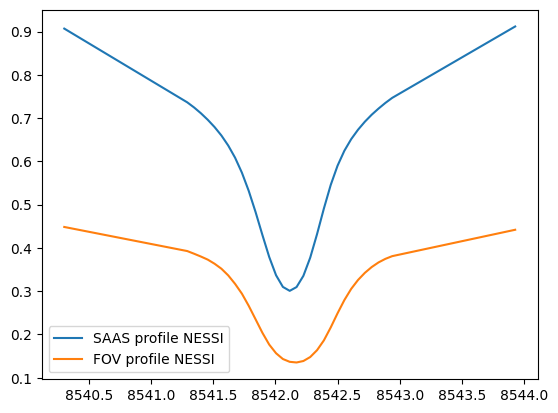

In [66]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63)

the edges of the patch are denoted by the xlim: (800, 920) and ylim: (10, 100)


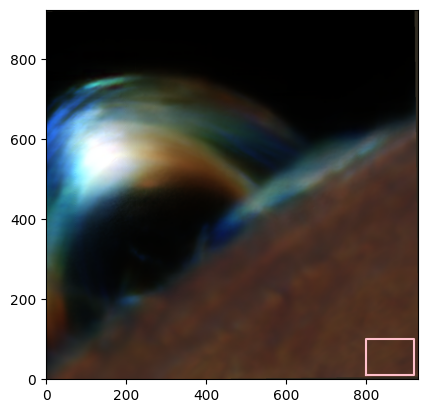

(90, 120) (90, 120) (89, 119)


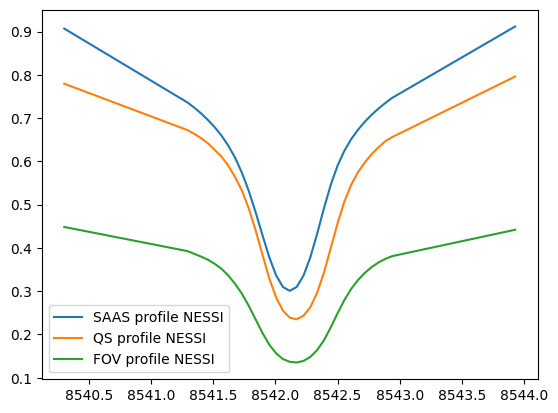

{'frame': 0, 'xlim': (800, 920), 'ylim': (10, 100), 'color': 'pink'}

In [67]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaIR.quiet_sun

[8540.25  8541.055 8541.265 8541.405 8541.545 8541.65  8541.72  8541.79
 8541.86  8541.93  8542.    8542.07  8542.14  8542.21  8542.28  8542.35
 8542.455 8542.595 8542.735 8542.945 8543.75 ]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 258.15370924501207
        x: [-9.849e-02 -2.987e-02  3.683e+00]
      nit: 15
      jac: [ 6.485e-05  7.629e-06  2.289e-05]
 hess_inv: [[ 4.469e-06  2.743e-06 -3.700e-06]
            [ 2.743e-06  4.940e-06 -2.684e-06]
            [-3.700e-06 -2.684e-06  3.128e-06]]
     nfev: 382
     njev: 91


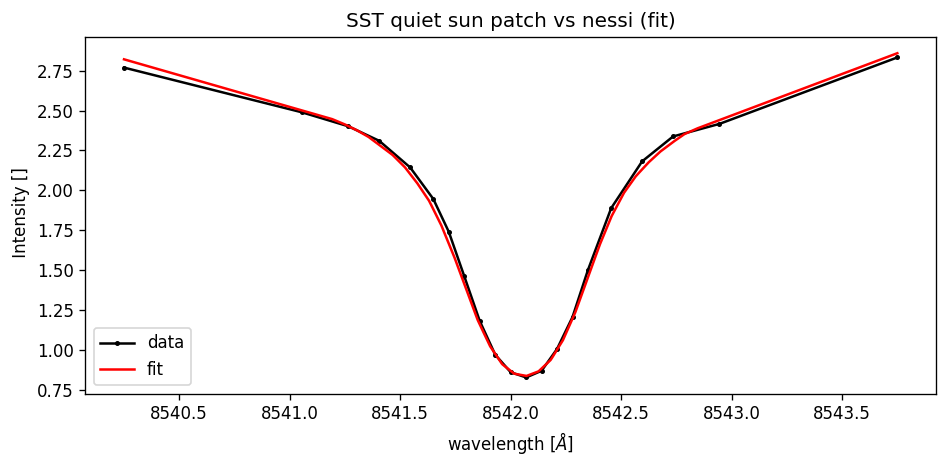

de p-waarde is  0.7065485023088622 
Chi^2 reduced= 14.341872735834004 
aantal vrijheidgraden= 18 
chi^2= 258.15370924501207
we behouden de fit tot op een betrouwbaarheidsniveau van  0.7065485023088622 
Oftewel verwerp als p-waarde <lpha-niveau 


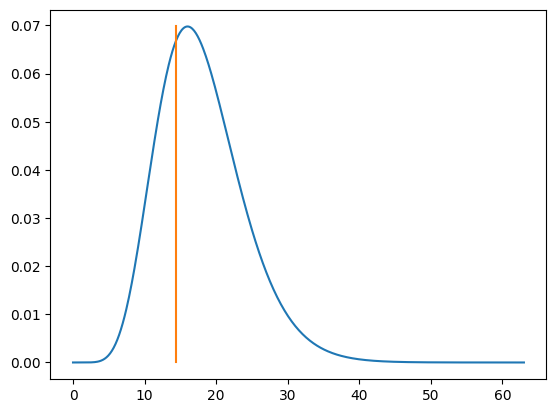

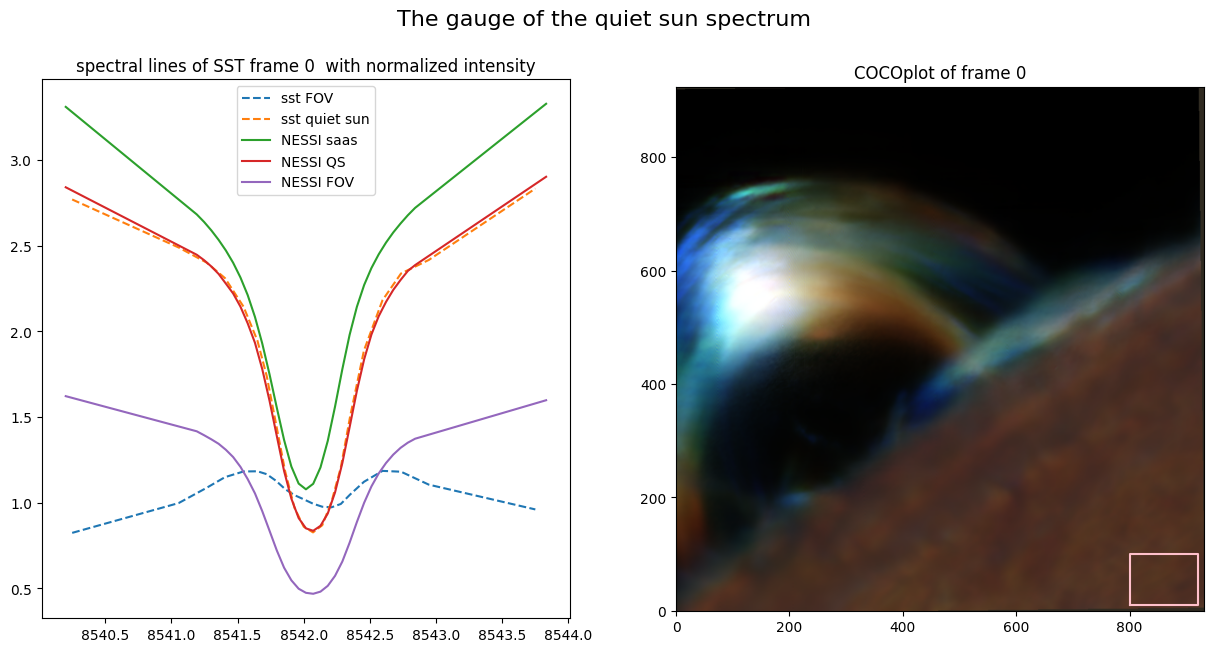

In [68]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

D:\solar flares/data/2017-09-06\use_nessi3.py:1656: RuntimeWarning: divide by zero encountered in scalar divide
  STD_Wavl = -1*ir.fit_transform(Deltas, -1* STD_Wavl2)
D:\solar flares/data/2017-09-06\use_nessi3.py:1647: RuntimeWarning: invalid value encountered in scalar divide
  
D:\solar flares/data/2017-09-06\use_nessi3.py:1644: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ax[1].plot(Deltas, STD_Area, label='option area')
D:\solar flares/data/2017-09-06\use_nessi3.py:1644: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subr

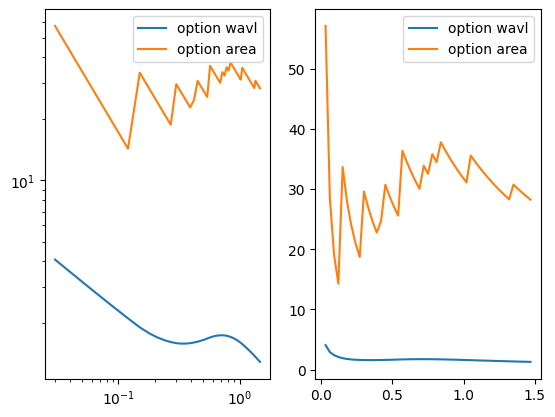

STD_Area = array([114.23520248,  57.11760124,  28.55880062,  19.03920041,
        14.27940031,  33.6686039 ,  28.05716991,  24.04900278,
        21.04287744,  18.70477994,  29.59018071,  26.90016429,
        24.65848393,  22.76167747,  24.7023151 ,  30.70606656,
        28.7869374 ,  27.09358814,  25.5883888 ,  36.36215277,
        34.54404513,  32.8990906 ,  31.40367739,  30.03830011,
        33.88538625,  32.5299708 ,  35.79739546,  34.471566  ,
        37.78085709,  36.47806891,  35.26213328,  34.12464511,
        33.05824995,  32.0564848 ,  31.11364701,  35.56714739,
        34.57917107,  33.64459888,  32.7592147 ,  31.91923484,
        31.12125397,  30.36219899,  29.63928949,  28.95000369,
        28.29204906,  30.74413723,  30.07578642,  29.43587608,
        28.82262866,  28.23441175]), STD_Wavl = array([0.        , 4.07927536, 2.91308647, 2.40187956, 2.10031424,
       1.89867161, 1.77230965, 1.69281081, 1.64133191, 1.60781279,
       1.58754681, 1.5796609 , 1.58058503, 1.587765

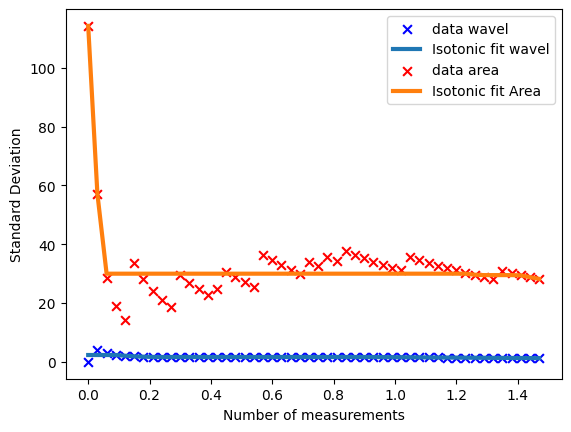

D:\solar flares/data/2017-09-06\use_nessi3.py:1721: RuntimeWarning: invalid value encountered in scalar divide
  w2, restx = restrict_intervalx2(interval, wavl)


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.15\AA$.
at an intesity of 3.1409837460965463e-06. For a standard deviation of 29.998653205723393.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.21\AA$.
at an intesity of 5.1241792612154674e-05. For a standard deviation of 1.6928108108368398.



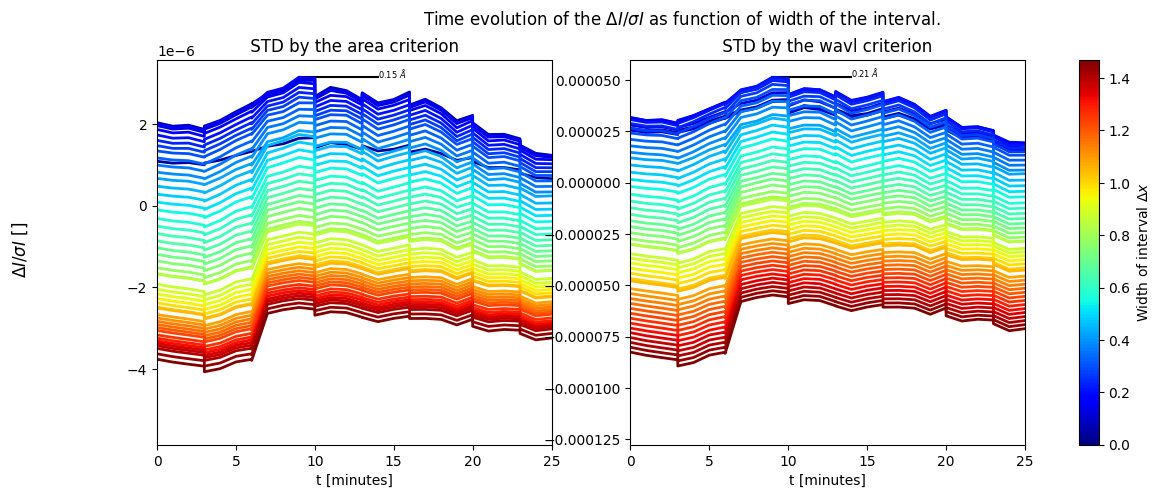

D:\solar flares/data/2017-09-06\use_nessi3.py:1889: RuntimeWarning: All-NaN slice encountered
  


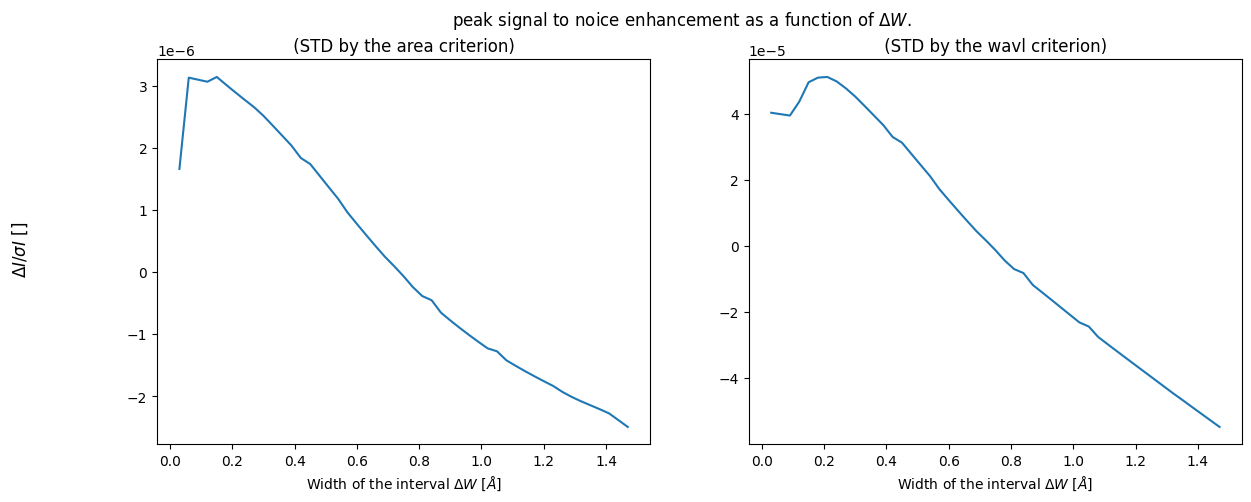

Directory 'line_data/optimal_width' already exists.


(array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 1.08517838e-06,  1.03900003e-06,  1.05319030e-06, ...,
         -2.25977323e-06, -2.21071416e-06, -2.17177150e-06],
        [ 2.02966759e-06,  1.94277864e-06,  1.96812309e-06, ...,
         -4.30610523e-06, -4.21403507e-06, -4.14018328e-06],
        ...,
        [-3.49118835e-06, -3.55987996e-06, -3.61037627e-06, ...,
         -5.17583883e-06, -5.18742822e-06, -5.10481861e-06],
        [-3.62330527e-06, -3.69279498e-06, -3.74395114e-06, ...,
         -5.29151175e-06, -5.30328236e-06, -5.21813607e-06],
        [-3.75607887e-06, -3.82624583e-06, -3.87801109e-06, ...,
         -5.40726247e-06, -5.41919711e-06, -5.33153969e-06]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 2.63918217e-05,  2.52687522e-05,  2.56138633e-05, ...,
         -5.49582753e-05, -5.37651458e

In [76]:
Deltas=np.arange(0,1.5, 0.03)
un.analyse_optimal_interval(CaIR, Deltas)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [77]:
un.save_for_further_analysis(CaIR, theor_CaIR)
